In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plot

This notebook will explore the NCDC storm data set. The time frame spans from 1951 to 2019. Starting off will be looking at the number of tornadoes per state per year. The final data format will have the states in the rows, and years for each column. First thing to do is set up each row with a state.

In [2]:
states = {'States':['ALABAMA','ALASKA','ARIZONA','ARKANSAS','CALIFORNIA','COLORADO','CONNECTICUT','DELAWARE','FLORIDA','GEORGIA','HAWAII','IDAHO','ILLINOIS','INDIANA','IOWA',
                'KANSAS','KENTUCKY','LOUISIANA','MAINE','MARYLAND','MASSACHUSETTS','MICHIGAN','MINNESOTA','MISSISSIPPI','MISSOURI','MONTANA','NEBRASKA','NEVADA','NEW HAMPSHIRE',
                'NEW JERSEY','NEW MEXICO','NEW YORK','NORTH CAROLINA','NORTH DAKOTA','OHIO','OKLAHOMA','OREGON','PENNSYLVANIA','RHODE ISLAND','SOUTH CAROLINA','SOUTH DAKOTA',
                'TENNESSEE','TEXAS','UTAH','VERMONT','VIRGINIA','WASHINGTON','WEST VIRGINIA','WISCONSIN','WYOMING']}
final_data = pd.DataFrame(data=states)
final_data.set_index("States", inplace = True)

Next is to iterate through each data file and save only the data this analysis is interested in, which in this case is torandic information. The fist data set will be looking at the number of tornadoes per state and add this information to the final data set. Then the program will save the data to Tornado_Count.csv

In [3]:
for i in range(69):
    year = 1951 + i
    input_file = pd.read_csv('Raw_files/StormEvents_details-ftp_v1.0_d'+str(year)+'.csv')
    #---------droping the columns that are not needed to make data management easier---------------------------
    work_df = input_file.drop(['BEGIN_DAY','BEGIN_TIME','END_YEARMONTH','END_DAY','END_TIME','EPISODE_ID','EVENT_ID','STATE_FIPS','END_RANGE','END_AZIMUTH','END_LOCATION','EPISODE_NARRATIVE','BEGIN_YEARMONTH','CZ_TYPE',
                    'CZ_FIPS','CZ_NAME','WFO','BEGIN_DATE_TIME','TOR_WIDTH','TOR_OTHER_WFO','TOR_OTHER_CZ_STATE','TOR_OTHER_CZ_FIPS','TOR_OTHER_CZ_NAME','BEGIN_RANGE','BEGIN_AZIMUTH','BEGIN_LOCATION','EVENT_NARRATIVE','DATA_SOURCE',
                    'MAGNITUDE','MAGNITUDE_TYPE','FLOOD_CAUSE','CATEGORY','CZ_TIMEZONE','END_DATE_TIME'], axis=1)
   #-------------change some of the string columns to categories to save memory space------------------------
    work_df["STATE"] = work_df["STATE"].astype("category")
    work_df["TOR_F_SCALE"] = work_df["TOR_F_SCALE"].astype("category")
    work_df["EVENT_TYPE"] = work_df["EVENT_TYPE"].astype("category")
    work_df["SOURCE"] = work_df["SOURCE"].astype("category")
    #-----------now to sort out all the tornadic events, and count them for each state, public reports will be filtered out
    mask1 = work_df["EVENT_TYPE"] == "Tornado"
    mask2 = work_df["SOURCE"] != "Public"
    df = work_df[mask1 & mask2]
    df = df["STATE"].value_counts().to_frame()
    df.rename(columns={"STATE":1951+i}, inplace= True)
    final_data = final_data.join(df,how="left")

#replace all nan to 0, set all cells to integer values and save the data frame to a .csv file    
final_data.replace(np.nan, 0, inplace=True)
final_data = final_data.loc[:].apply(np.int64)
final_data.to_csv("Tornado_Count.csv")    

C:\Users\Matthew King\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3063: DtypeWarning: Columns (26,28) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
C:\Users\Matthew King\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3063: DtypeWarning: Columns (28) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
C:\Users\Matthew King\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3063: DtypeWarning: Columns (29,34,35,37) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


Data importing is now complete, now to start explore this dataframe first by getting a quick overview and by setting different geographical regions in the lower US states.

2011    1998
2004    1946
2008    1880
2019    1656
2017    1594
dtype: int64

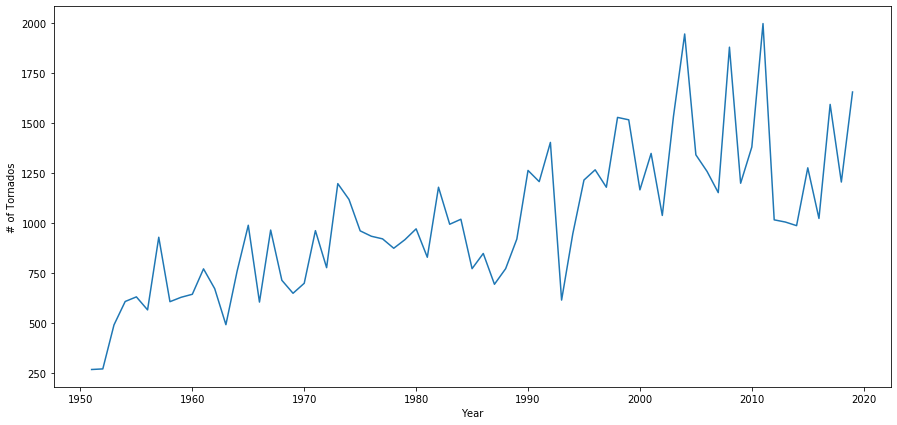

In [4]:
final_data.sum().plot(figsize=(15,7))
plot.ylabel("# of Tornados")
plot.xlabel("Year")
final_data.sum().nlargest(5)

Text(0.5, 114.0, 'Year')

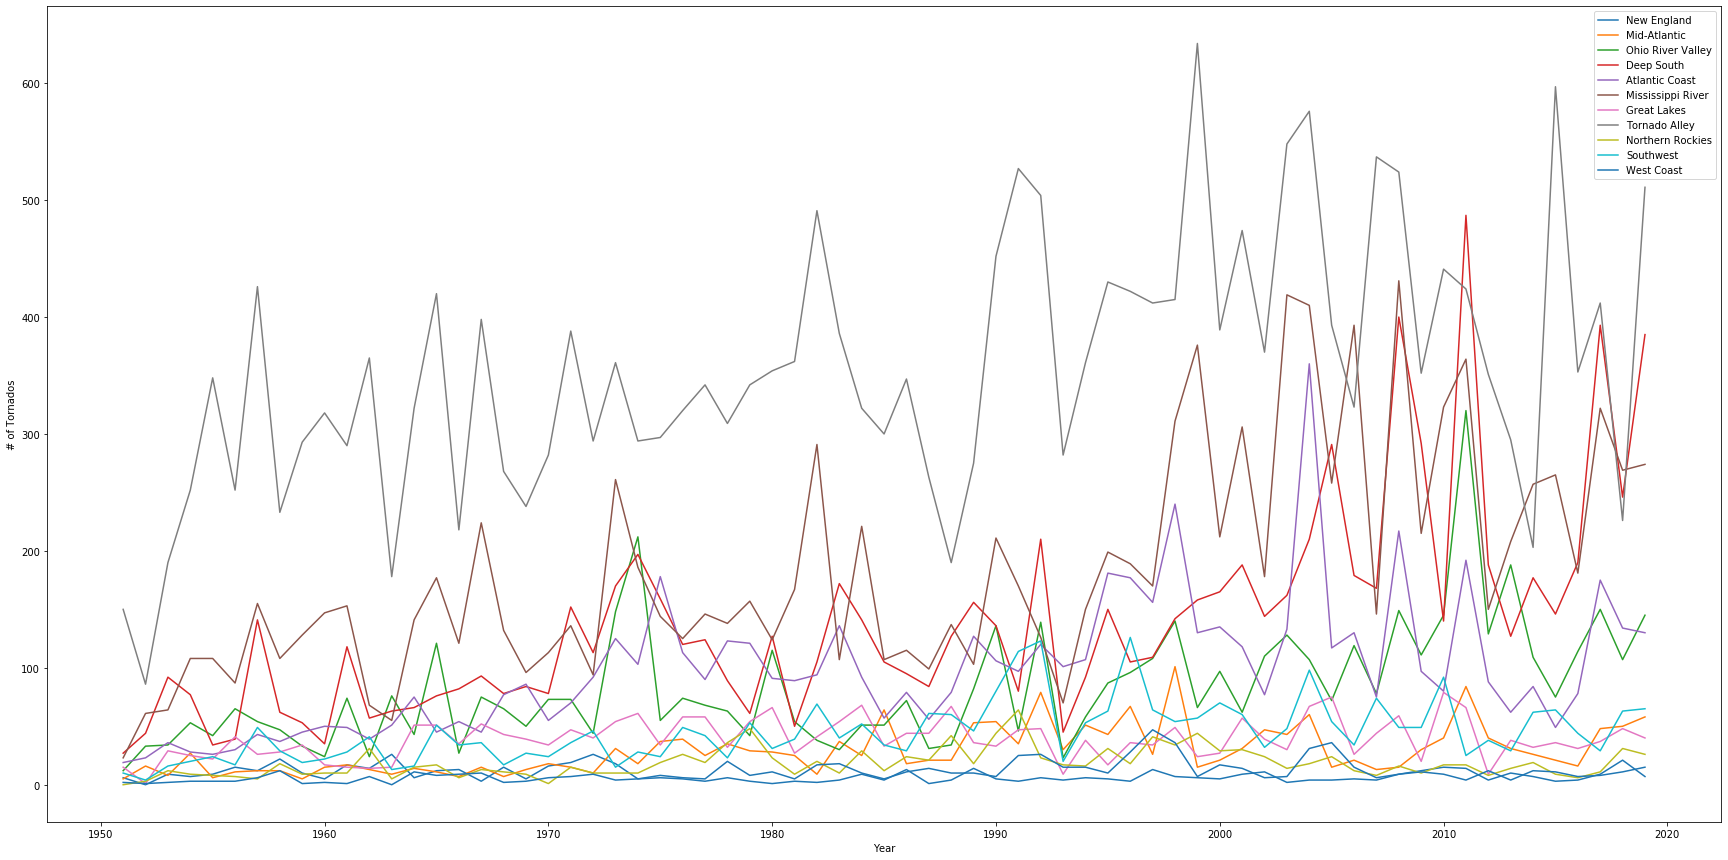

In [5]:
#defining regions in the lower 48 states to explore various locations for tornado activity
new_england = ["NEW HAMPSHIRE","MAINE","VERMONT","MASSACHUSETTS","RHODE ISLAND","CONNECTICUT"]
mid_atlantic = ["NEW YORK", "PENNSYLVANIA","NEW JERSEY","DELAWARE","MARYLAND"]
ohio_river = ["OHIO","WEST VIRGINIA","INDIANA","KENTUCKY","TENNESSEE"]
deep_south = ["GEORGIA","ALABAMA","MISSISSIPPI","LOUISIANA"]
atlantic_coast = ["VIRGINIA","NORTH CAROLINA","SOUTH CAROLINA","FLORIDA"]
mississippi_river = ["MINNESOTA","IOWA","ILLINOIS","MISSOURI","ARKANSAS"]
great_lakes = ["WISCONSIN","MICHIGAN"]
tornado_valley = ["NORTH DAKOTA","SOUTH DAKOTA","NEBRASKA","KANSAS","OKLAHOMA","TEXAS"]
northern_rockies = ["MONTANA","WYOMING","IDAHO"]
southwest = ["COLORADO","UTAH","NEW MEXICO","ARIZONA"]
west_coast = ["WASHINGTON","OREGON","CALIFORNIA","NEVADA"]

#create a data frame for each region
ne_data = final_data.loc[new_england].sum().rename("New England")
ma_data = final_data.loc[mid_atlantic].sum().rename("Mid-Atlantic")
or_data = final_data.loc[ohio_river].sum().rename("Ohio River Valley")
ds_data = final_data.loc[deep_south].sum().rename("Deep South")
ac_data = final_data.loc[atlantic_coast].sum().rename("Atlantic Coast")
mr_data = final_data.loc[mississippi_river].sum().rename("Mississippi River")
gl_data = final_data.loc[great_lakes].sum().rename("Great Lakes")
tv_data = final_data.loc[tornado_valley].sum().rename("Tornado Alley")
nr_data = final_data.loc[northern_rockies].sum().rename("Northern Rockies")
sw_data = final_data.loc[southwest].sum().rename("Southwest")
wc_data = final_data.loc[west_coast].sum().rename("West Coast")

#combine all the individual regions into one dataframe
region_data = pd.concat([ne_data,ma_data,or_data,ds_data,ac_data,mr_data,gl_data,tv_data,nr_data,sw_data,wc_data],axis=1)
#for a quick look, print and save a time series chart of each region
region_data.plot(figsize=(30,15))
plot.savefig("Region_Totals.jpeg")
plot.ylabel("# of Tornados")
plot.xlabel("Year")

In [6]:
region_data.describe()

,New England,Mid-Atlantic,Ohio River Valley,Deep South,Atlantic Coast,Mississippi River,Great Lakes,Tornado Alley,Northern Rockies,Southwest,West Coast
count,69.000000,69.000000,69.000000,69.000000,69.000000,69.000000,69.000000,69.000000,69.000000,69.000000,69.000000
mean,8.478261,28.869565,83.710145,139.869565,98.173913,183.768116,39.130435,355.101449,18.478261,45.028986,10.666667
std,5.967088,20.226594,51.753119,90.302582,57.549456,95.697769,16.830394,110.240398,12.285344,25.651494,8.997821
min,0.000000,5.000000,12.000000,27.000000,19.000000,23.000000,1.000000,86.000000,0.000000,4.000000,0.000000
25%,4.000000,15.000000,47.000000,80.000000,55.000000,115.000000,28.000000,290.000000,10.000000,27.000000,5.000000
50%,6.000000,25.000000,73.000000,127.000000,90.000000,153.000000,38.000000,351.000000,16.000000,41.000000,9.000000
75%,12.000000,39.000000,111.000000,168.000000,125.000000,224.000000,51.000000,420.000000,24.000000,60.000000,12.000000
max,26.000000,101.000000,320.000000,487.000000,360.000000,431.000000,79.000000,634.000000,64.000000,126.000000,47.000000


A quick look seems to show there is an increase in tornadic activity throughout the data set when considered the US as a whole. Examining over the regional data sets shows how tornado alley dominates the region but doesn't appear to show a significant increase in tornadic activity over time. Deep South, Atlantic Coast, and Ohio River Valley states appear to show the biggest increase, particularly over the last two decades. The Mississippi River states also appear to have an increase of tornadic activity over time. 

Next steps will include a check to see if a single state dominates the region they are listed in, calculate and check decadal averages to see if there is a statistical increase over time, and if so, which regions have the greatest increase in tornadic activity.

In [7]:
(final_data.loc["MASSACHUSETTS"]/ne_data).mean()

0.2853774834607105